# Working with Convolutions

### Introduction

So far, we have seen how neural networks allow us to train different weights and biases accross neurons, and across layers of neurons to perform tasks such as classifying images.  

With our MNIST dataset, each grayscaled image had 784 pixels.  But with other datasets, we will  

We can see, from working with images, that even a relatively small image, of say 200x200 pixels, will require 40,000 features for a single neuron in a single layer.  At a certain point, there are simply too many features to both hold in memory, and to train.

In this lesson, we'll learn about feature engineering which allows for training a neural network with fewer parameters, called `convolutions`.  

### Convolutions

We can get a sense of how convolutional neural networks work by looking at the image below.

<img src="convolution-kernel.png" width="80%">

> From [A Guide to Convolution Arithmetic for Deep Learning](https://arxiv.org/abs/1603.07285).

The large 4x4 grid on the bottom represents an image.  We can see that a dark blue 3x3 grid is scanning over our image, moving from region to region.  This shaded blue grid is our **kernel**.  It translates the information it extracts from the region into a separate entry in the green matrix above called **activation map**.  The region that it is scanning over at any given time is called the **receptive field**.

So to summarize, we start with an image, which is a grid of pixels.  We scan our kernel over our image which then extracts information into activation layer.  


What kind of information is extracted?  Well, let's imagine we have a kernel that detects whether there is a horizontal line in a given region.  Let's say our kernel is first applied to the top left region, detects that *there is in fact* a horizontal line and then translate this to the activation as the number one in the top left corner of the activation layer.     



### Show me the code

Ok, enough explaining.  Let's load up an image and see how this works.  

In [12]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [21]:
first_image = X[0].reshape(28, 28)
first_image.shape

(28, 28)

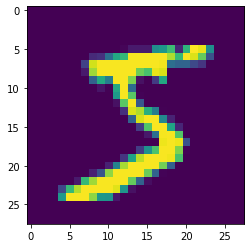

In [23]:
from matplotlib.pyplot import imshow

imshow(first_image)

We can see that our first image is the number five, and as we know that the light lines are represented by pixels with largers numbers.

> We can use the code below to see both the pixels and represented colors of the first few rows of our image.

In [84]:
import pandas as pd
df = pd.DataFrame(first_image[3:12]).astype('int')
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
3,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
4,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
5,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0


Ok, so that's an image, now let's see a kernel.

In [91]:
import numpy as np
bottom_edge = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])
bottom_edge

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

Now to apply a kernel to a region, we perform entrywise multiplication, and then add up the resulting numbers.  Let's translate this into a function.

In [53]:
def apply_kernel(kernel, region):
    mult = kernel*region
    return mult.to_numpy().sum()

Ok, time to apply this to a few regions to see how this works.  Applied to a region with all zeros, we just get back a zero.

And applied to a region where both the top and bottom is dark, we get back a number close to zero.

In [88]:
dark_region = df.iloc[6:9, 13:16]
dark_region.style.background_gradient('Greys')

,13,14,15
6,205,11,0
7,90,0,0
8,190,2,0


In [96]:
apply_kernel(bottom_edge, dark_region)

-24

Do you see why?  Remember our top_edge kernel is filled with ones on the top row and negative ones on the bottom row.

In [94]:
bottom_edge

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

So if the entire region is dark, the two will cancel each other out.

In [95]:
bottom_edge*dark_region

,13,14,15
6,-205,-11,0
7,0,0,0
8,190,2,0


In [93]:
(top_edge*dark_region).to_numpy().sum()

-24

But applied to a region where only a bottom row has large numbers, the regions won't cancel each other out and the sum will be fairly large.

In [100]:
df.iloc[0:3, 20:23]

,20,21,22
0,0,0,0
1,0,0,0
2,166,255,247


In [101]:
apply_kernel(bottom_edge, df.iloc[0:3, 20:23])

668

So we can see how applying the kernel to a region can, in this case, summarize the whether a region has a top edge.  And remember, that we'll apply this kernel throughout the image.

In [122]:
coords = [x_coord for x_coord in range(first_image.shape[0])][1:-1]
# coords

In [123]:
combos = [[(x_coord, y_coord) for x_coord in coords] for y_coord in coords]

In [147]:
activation_grid = [apply_kernel(bottom_edge, image_df.loc[x-1:x+1, y-1:y+1])
           for row in combos for x,y in row]

In [146]:
kernel = np.array([[-1, 0, 1],
       [ -1,  0,  1],
       [ -1,  0,  1]])

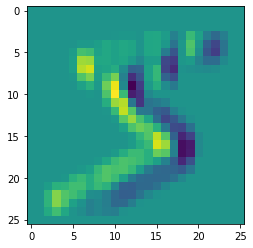

In [148]:
imshow(np.array(activation_grid).reshape(26, 26).T)

### Wrapping Up

Let's point out a couple of items before wrapping up the lesson.

1. Kernels are found through gradient descent

So far, we have inputted 3x3 kernels which produce an activation map of different features.  But in a real neural network, we'll simply specify the dimensions of the kernel, and then the weights of the kernel will be found through gradient descent.  This way, we'll let the neural network determine what weights produce features that allow for network to minimize the cost function.

2. Multiple Kernels per layer

Just like we have multiple neurons in a linear layer of a neural network, we'll have multiple kernels in a convolutional layer of a convolutional neural network.  So if start with three different kernels in a layer, this means that our layer will return three different activation maps.  We can think of each activation map as a different feature, and the input of these three features can then be fed through another convolutional layer to be broken down further.

### Summary

In this lesson, we learned about how to perform feature engineering with convolutions.  We saw that in a convolutional neural network, we apply a kernel to 